In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.optimizers import Adam
import os, cv2, json

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# For easy acces to files
WORK_DIR = "../content/drive/MyDrive/cassava-leaf-disease-classification/"
os.listdir(WORK_DIR)

['train.csv',
 'sample_submission.csv',
 'label_num_to_disease_map.json',
 'train_tfrecords',
 'test_images',
 'test_tfrecords',
 'train_images',
 '.ipynb_checkpoints']

In [4]:
with open('../content/drive/MyDrive/cassava-leaf-disease-classification/label_num_to_disease_map.json', 'r') as file:
    labels = json.load(file)
    
labels

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [5]:
data = pd.read_csv(WORK_DIR + "train.csv")

In [6]:
data.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [7]:
data.dtypes

image_id    object
label        int64
dtype: object

In [8]:
#change for the ImageDatagen and flow_from_dataframe
data.label = data.label.astype("str")

In [9]:
data.dtypes
data.shape[0]
data.label.value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [10]:
IMG_SIZE = 300

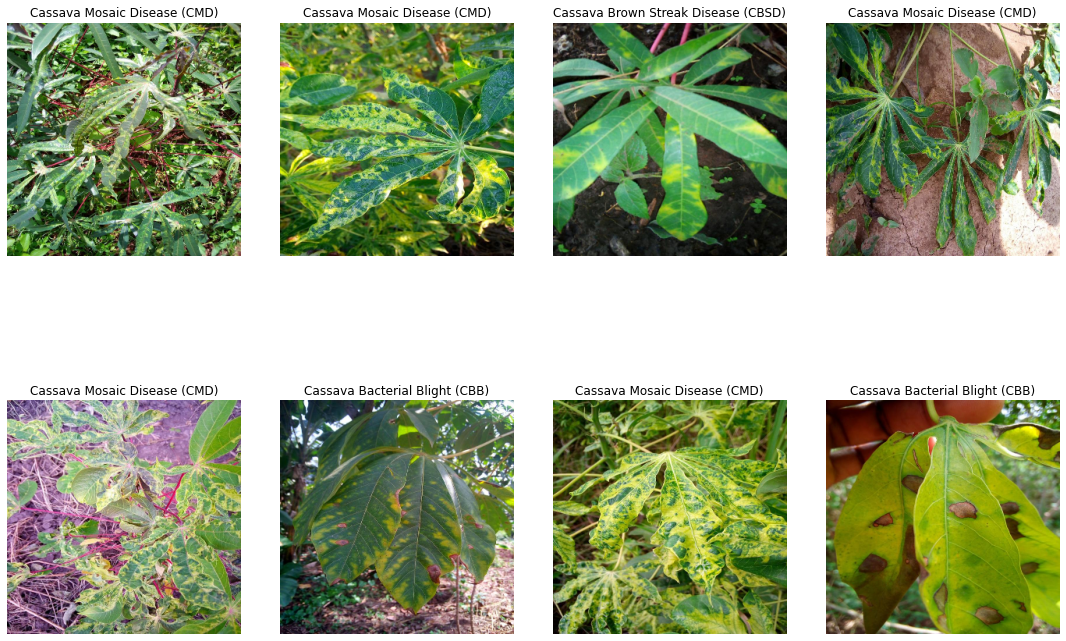

In [11]:
plt.figure(figsize=(15,12))
data_sample = data.sample(9).reset_index(drop=True)

for i in range(8):
    plt.subplot(2,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [12]:
labels.get("0")

'Cassava Bacterial Blight (CBB)'

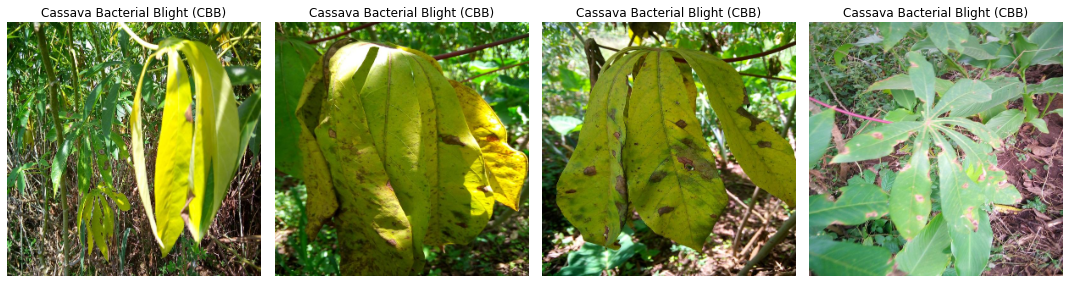

In [13]:
plt.figure(figsize=(15,12))
data_sample = data[data.label=="0"].sample(4).reset_index(drop=True)
for i in range(4):
    plt.subplot(1,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [14]:
labels.get("1")

'Cassava Brown Streak Disease (CBSD)'

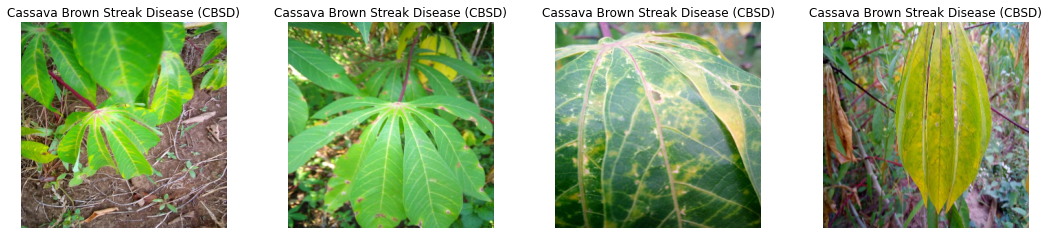

In [15]:
plt.figure(figsize=(15,12))
data_sample = data[data.label=="1"].sample(4).reset_index(drop=True)
for i in range(4):
    plt.subplot(1,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [16]:
labels.get("2")

'Cassava Green Mottle (CGM)'

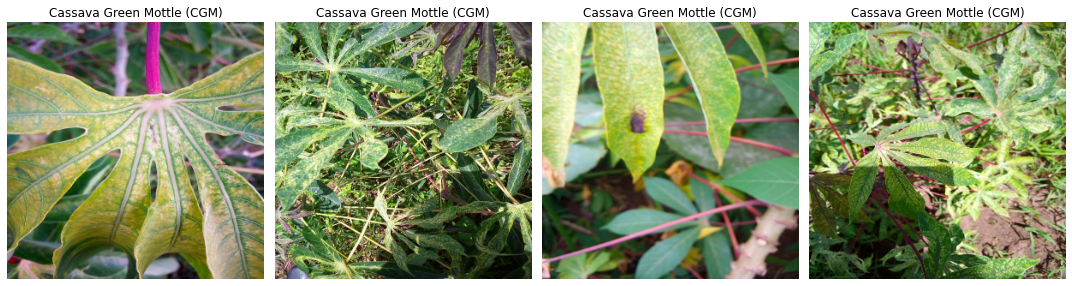

In [17]:
plt.figure(figsize=(15,12))
data_sample = data[data.label=="2"].sample(4).reset_index(drop=True)
for i in range(4):
    plt.subplot(1,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [18]:
labels.get("3")

'Cassava Mosaic Disease (CMD)'

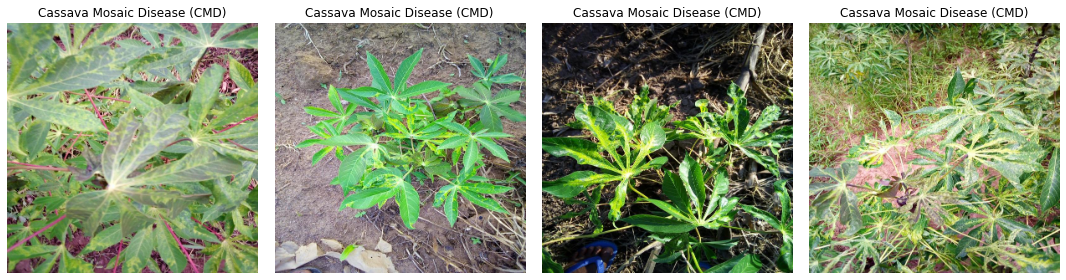

In [19]:
plt.figure(figsize=(15,12))
data_sample = data[data.label=="3"].sample(4).reset_index(drop=True)
for i in range(4):
    plt.subplot(1,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [20]:
labels.get("4")

'Healthy'

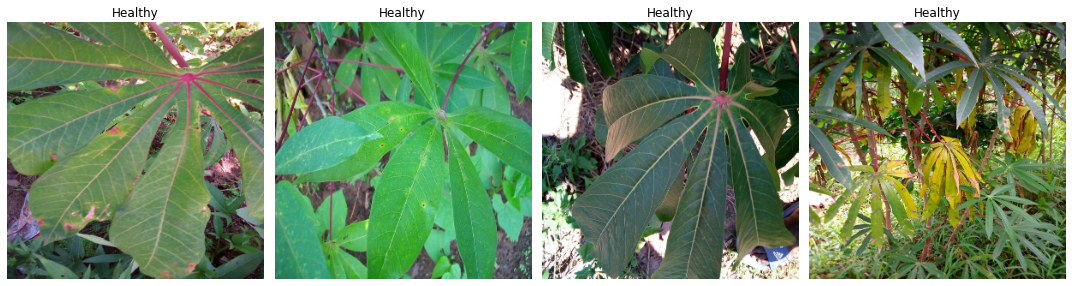

In [21]:
plt.figure(figsize=(15,12))
data_sample = data[data.label=="4"].sample(4).reset_index(drop=True)
for i in range(4):
    plt.subplot(1,4,i+1)
    
    img = cv2.imread(WORK_DIR + "train_images/" + data_sample.image_id[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.axis("off")
    plt.imshow(img)
    plt.title(labels.get(data_sample.label[i]))
    
plt.tight_layout()
plt.show()

In [22]:
train_generator = ImageDataGenerator(
                                    #featurewise_center=False,                                    
                                    #samplewise_center=False,
                                    #featurewise_std_normalization=False,
                                    #samplewise_std_normalization=False, 
                                    #zca_whitening=False,
                                    #zca_epsilon=1e-06,
                                    #rotation_range=90,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    #brightness_range=None,
                                    shear_range=25,
                                    zoom_range=0.3,
                                    #channel_shift_range=0.0,
                                    #fill_mode="nearest",
                                    #cval=0.0,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    #rescale=None,
                                    #preprocessing_function=None,
                                    #data_format=None,
                                    validation_split=0.2,
                                    #dtype=None,
) \
        .flow_from_dataframe(
                            data,
                            directory = WORK_DIR + "train_images",
                            x_col = "image_id",
                            y_col = "label",
                            #weight_col = None,
                            target_size = (IMG_SIZE, IMG_SIZE),
                            #color_mode = "rgb",
                            #classes = None,
                            class_mode = "categorical",
                            batch_size = 32,
                            shuffle = True,
                            #seed = 34,
                            #save_to_dir = None,
                            #save_prefix = "",
                            #save_format = "png",
                            subset = "training",
                            #interpolation = "nearest",
                            #validate_filenames = True
)

Found 17118 validated image filenames belonging to 5 classes.


In [23]:
valid_generator = ImageDataGenerator(
                                    validation_split = 0.2
) \
        .flow_from_dataframe(
                            data,
                            directory = WORK_DIR + "train_images",
                            x_col = "image_id",
                            y_col = "label",
                            target_size = (IMG_SIZE, IMG_SIZE),
                            class_mode = "categorical",
                            batch_size = 32,
                            shuffle = True,
                            #seed = 34,
                            subset = "validation")

Found 4279 validated image filenames belonging to 5 classes.


In [24]:
valid_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [25]:
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(IMG_SIZE,IMG_SIZE, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(5, activation = "softmax"))
    
    return model 

In [26]:

model = modelEfficientNetB0()

16719872/16705208 [==============================] - 0s 0us/step


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 10, 10, 1280)     4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________


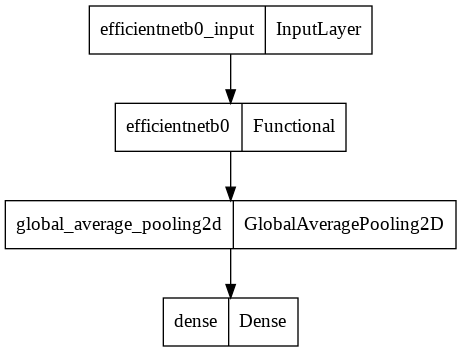

In [28]:
from tensorflow.keras import utils

utils.plot_model(model)

In [29]:
model_check = ModelCheckpoint(
                            "./firstTry.h5",
                            monitor = "val_loss",
                            verbose = 1,
                            save_best_only = True,
                            save_weights_only = False,
                            mode = "min")

In [30]:
early_stop= EarlyStopping(
                                monitor = "val_loss",
                                min_delta=0.001,
                                patience=3,
                                verbose=1,
                                mode="min",
                                #baseline=None,
                                restore_best_weights=False)

In [31]:
reduce_lr = ReduceLROnPlateau(
                                monitor="val_loss",
                                factor=0.1,
                                patience=3,
                                verbose=1,
                                mode="min",
                                min_delta=0.0001,
                                #cooldown=0,
                                #min_lr=0
)

In [32]:
model.compile(optimizer = "adam",
            loss = "categorical_crossentropy",
            metrics = ["accuracy"])

In [34]:
history = model.fit_generator(train_generator,
                            epochs =10,
                            validation_data = valid_generator,
                             callbacks = [model_check,early_stop,reduce_lr])

Epoch 1/10
535/535 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.8227
Epoch 1: val_loss improved from inf to 0.48845, saving model to ./firstTry.h5
535/535 [==============================] - 3131s 6s/step - loss: 0.5131 - accuracy: 0.8227 - val_loss: 0.4885 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 2/10
535/535 [==============================] - ETA: 0s - loss: 0.4752 - accuracy: 0.8369
Epoch 2: val_loss did not improve from 0.48845
535/535 [==============================] - 606s 1s/step - loss: 0.4752 - accuracy: 0.8369 - val_loss: 1.0633 - val_accuracy: 0.5994 - lr: 0.0010
Epoch 3/10
535/535 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8447
Epoch 3: val_loss improved from 0.48845 to 0.46900, saving model to ./firstTry.h5
535/535 [==============================] - 608s 1s/step - loss: 0.4443 - accuracy: 0.8447 - val_loss: 0.4690 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 4/10
535/535 [==============================] - ETA: 0s - loss:

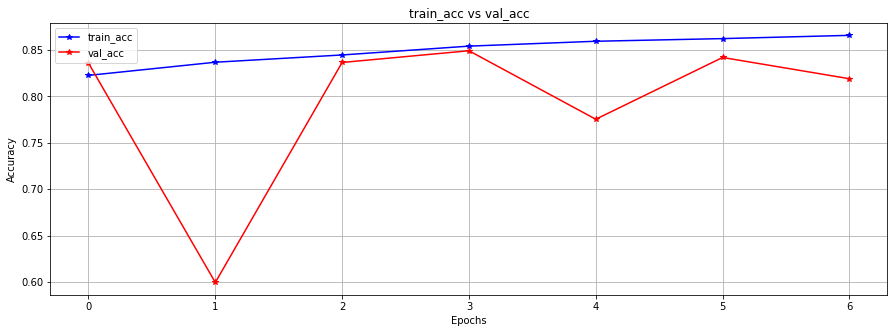

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], 'b*-', label="train_acc")
plt.plot(history.history['val_accuracy'], 'r*-', label="val_acc")
plt.grid()
plt.title("train_acc vs val_acc")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

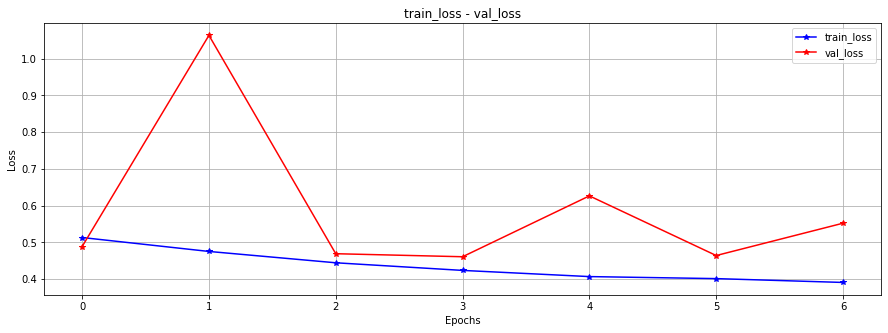

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], 'b*-', label="train_loss")
plt.plot(history.history['val_loss'], 'r*-', label="val_loss")
plt.grid()
plt.title("train_loss - val_loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [37]:
import os
import cv2
import json
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
# model = keras.models.load_model("./firstTry.h5")

In [38]:
preds = []
ss = pd.read_csv(WORK_DIR + "sample_submission.csv")
for image in ss.image_id:
    img = keras.preprocessing.image.load_img(WORK_DIR + "test_images/" + image)
    img = keras.preprocessing.image.img_to_array(img)
    img = keras.preprocessing.image.smart_resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img, 0)
    prediction = model.predict(img)
    preds.append(np.argmax(prediction))

my_submission = pd.DataFrame({'image_id': ss.image_id, 'label': preds})
my_submission.to_csv('submission.csv', index=False) 

In [39]:
my_submission

image_id  label
0  2216849948.jpg      4

In [40]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 40 kB 6.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [41]:
!pwd

/content


In [42]:
%cd ../content/drive/MyDrive/cassava-leaf-disease-classification

/content/drive/MyDrive/cassava-leaf-disease-classification


In [49]:
!mkdir tensorflowjs-model2

In [50]:
!tensorflowjs_converter --input_format keras /content/firstTry.h5 /content/drive/MyDrive/cassava-leaf-disease-classification/tensorflowjs-model2

weight normalization/count with shape () and dtype int64 was auto converted to the type int32


In [53]:
!zip -r tensorflowjs-model2.zip tensorflowjs-model2

  adding: tensorflowjs-model2/ (stored 0%)
  adding: tensorflowjs-model2/group1-shard1of4.bin (deflated 7%)
  adding: tensorflowjs-model2/group1-shard2of4.bin (deflated 7%)
  adding: tensorflowjs-model2/group1-shard3of4.bin (deflated 7%)
  adding: tensorflowjs-model2/group1-shard4of4.bin (deflated 7%)
  adding: tensorflowjs-model2/model.json (deflated 95%)


In [57]:
from google.colab import files
files.download('tensorflowjs-model2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>